# K-Nearest Neighbors Model Performance with Feature Scaling

#### The Nifty 50 represents the top 50 companies in the Indian stock market. Its historical price movements can be a valuable dataset for KNN models predicting future trends due to KNN's strength in learning from similar data points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('NSE.csv')
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,10-05-2023,18313.59961,18326.75000,18211.94922,18315.09961,18315.09961,220500
1,11-05-2023,18357.80078,18389.69922,18270.40039,18297.00000,18297.00000,248900
2,12-05-2023,18273.75000,18342.75000,18194.55078,18314.80078,18314.80078,241700
3,15-05-2023,18339.30078,18458.90039,18287.90039,18398.84961,18398.84961,216100


<div class="alert alert-success">
<b>Reanme</b> 
</div>

In [3]:
df.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close","Adj Close":"adj close","Volume":"volume"}, inplace= True)
df.head()

,date,open,high,low,close,adj close,volume
0,10-05-2023,18313.59961,18326.75000,18211.94922,18315.09961,18315.09961,220500
1,11-05-2023,18357.80078,18389.69922,18270.40039,18297.00000,18297.00000,248900
2,12-05-2023,18273.75000,18342.75000,18194.55078,18314.80078,18314.80078,241700
3,15-05-2023,18339.30078,18458.90039,18287.90039,18398.84961,18398.84961,216100
4,16-05-2023,18432.34961,18432.34961,18264.34961,18286.50000,18286.50000,219500


In [4]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
df.head()

,date,open,high,low,close,adj close,volume
0,2023-05-10,18313.59961,18326.75000,18211.94922,18315.09961,18315.09961,220500
1,2023-05-11,18357.80078,18389.69922,18270.40039,18297.00000,18297.00000,248900
2,2023-05-12,18273.75000,18342.75000,18194.55078,18314.80078,18314.80078,241700
3,2023-05-15,18339.30078,18458.90039,18287.90039,18398.84961,18398.84961,216100
4,2023-05-16,18432.34961,18432.34961,18264.34961,18286.50000,18286.50000,219500


In [5]:
df.sort_values(by='date', inplace=True)
df.head()

,date,open,high,low,close,adj close,volume
0,2023-05-10,18313.59961,18326.75000,18211.94922,18315.09961,18315.09961,220500
1,2023-05-11,18357.80078,18389.69922,18270.40039,18297.00000,18297.00000,248900
2,2023-05-12,18273.75000,18342.75000,18194.55078,18314.80078,18314.80078,241700
3,2023-05-15,18339.30078,18458.90039,18287.90039,18398.84961,18398.84961,216100
4,2023-05-16,18432.34961,18432.34961,18264.34961,18286.50000,18286.50000,219500


In [6]:
df.shape

(247, 7)

In [7]:
print("Starting date: ",df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Starting date:  2023-05-10 00:00:00
Ending date:  2024-05-10 00:00:00
Duration:  366 days 00:00:00


C:\Users\divya\AppData\Local\Temp\ipykernel_20440\2213194285.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Starting date: ",df.iloc[0][0])
C:\Users\divya\AppData\Local\Temp\ipykernel_20440\2213194285.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Ending date: ", df.iloc[-1][0])
C:\Users\divya\AppData\Local\Temp\ipykernel_20440\2213194285.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Duration: ",

In [8]:
closedf = df[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (247, 2)


<div class="alert alert-success">
<b>Droping date column</b> 
</div>

In [9]:

close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(247, 1)


<div class="alert alert-success">
<b>Splitting</b> 
</div>

In [10]:

X = df[['open', 'high', 'low', 'volume', 'adj close']].values
y = df['close'].values 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
            X, y, test_size = 0.2, random_state=42) 

<div class="alert alert-success">
<b>Scaling</b> 
</div>

In [11]:
# Define and fit the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

# Transform training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model with scaled features
knn = KNeighborsRegressor(n_neighbors=4)  
knn.fit(X_train_scaled, y_train)

# Make predictions on testing data
y_pred = knn.predict(X_test_scaled)

<div class="alert alert-success">
<b>Training KNN</b> 
</div>

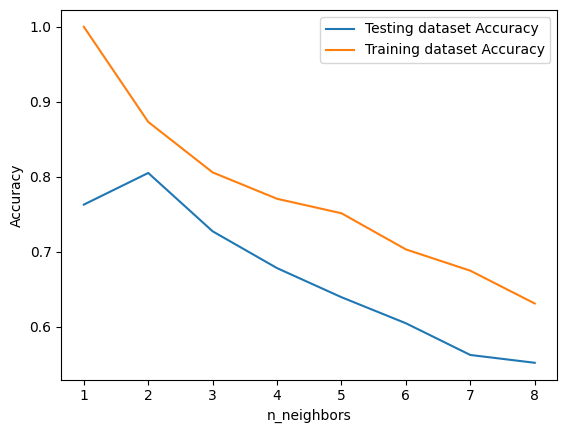

In [12]:

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()


#### The ideal value of k for the model is in the range of 2-4 neighbors based on the graph. In this range, the test accuracy is high and isn't significantly increasing with more neighbors.

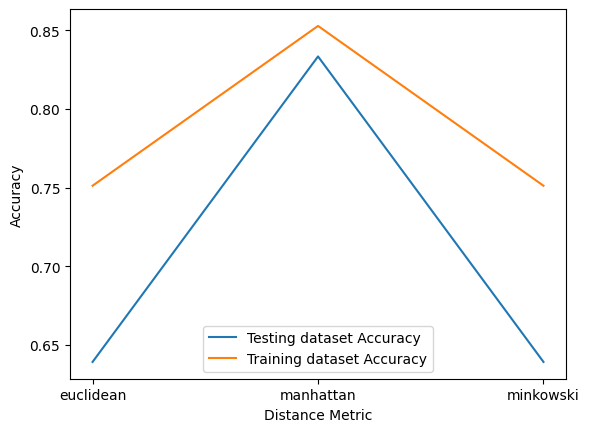

In [13]:
# Define distance metrics to evaluate
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Create empty arrays to store accuracy
train_accuracy = np.empty(len(distance_metrics))
test_accuracy = np.empty(len(distance_metrics))

# Loop over distance metrics
for i, metric in enumerate(distance_metrics):
  knn = KNeighborsRegressor(n_neighbors=5, metric=metric)  # n_neighbors=5 based on previous analysis
  knn.fit(X_train, y_train)

  # Compute training and test data accuracy
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot (similar to previous code)
plt.plot(distance_metrics, test_accuracy, label='Testing dataset Accuracy')
plt.plot(distance_metrics, train_accuracy, label='Training dataset Accuracy')
plt.legend()
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.show()


#### Based on the graph, a good choice for the number of neighbors (k) in the range of 2-4. In this range, the test accuracy is high and isn't significantly increasing with more neighbors. This suggests the model is not overfitting the training data

<div class="alert alert-success">
<b>Evaluation</b> 
</div>

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate multiple error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


Mean Absolute Error (MAE): 56.57039040000032
Mean Squared Error (MSE): 9807.328176071702
R-squared: 0.9958339375137107


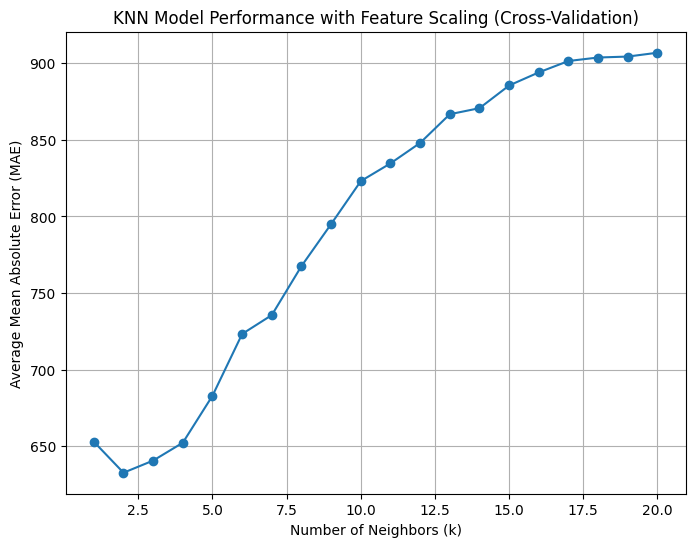

In [15]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Assuming you already have your data loaded into X_train and y_train

# Define the number of folds for cross-validation (e.g., 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a range of n_neighbors values to explore
n_neighbors_range = range(1, 21)  # Adjust the range as needed

# Store results (average MAE for each n_neighbors value)
mae_scores = []

# Loop through different n_neighbors values
for n_neighbors in n_neighbors_range:
  # Create a KNeighborsRegressor object for each n_neighbors value
  knn = KNeighborsRegressor(n_neighbors=n_neighbors)

  # Initialize total MAE for this n_neighbors value
  total_mae = 0

  # Iterate through folds (using kfold.split directly)
  for train_index, test_index in kfold.split(X_train):
    # Split data into training and testing sets for this fold
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Train the model on the fold's training data
    knn.fit(X_train_fold, y_train_fold)

    # Make predictions on the fold's testing data
    y_pred = knn.predict(X_test_fold)

    # Calculate MAE for this fold
    fold_mae = mean_absolute_error(y_test_fold, y_pred)

    # Add fold's MAE to the total MAE for this n_neighbors value
    total_mae += fold_mae

  # **Calculate average MAE using the number of folds in kfold**
  average_mae = total_mae / kfold.n_splits  # Use kfold.n_splits for number of folds

  # Store the average MAE for this n_neighbors value
  mae_scores.append(average_mae)
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(n_neighbors_range, mae_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Mean Absolute Error (MAE)')
plt.title('KNN Model Performance with Feature Scaling (Cross-Validation)')
plt.grid(True)

# Show the plot
plt.show()